# Title of Project

# Wine Quality Prediction using Support Vector Machine

#objective
Develop a robust and accurate machine learning model to predict wine quality based on physicochemical properties. The goal is to assist winemakers in quality control by providing a reliable assessment of wine quality using easily measurable characteristics, thereby optimizing production processes and enhancing overall product quality.

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience. (If I am mistaken and the public license type disallowed me from doing so, I will take this down if requested.)

Content

For more information, read [Cortez et al., 2009].
Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Tips

What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value. Without doing any kind of feature engineering or overfitting you should be able to get an AUC of .88 (without even using random forest algorithm)

KNIME is a great tool (GUI) that can be used for this.
1 - File Reader (for csv) to linear correlation node and to interactive histogram for basic EDA.
2- File Reader to 'Rule Engine Node' to turn the 10 point scale to dichtome variable (good wine and rest), the code to put in the rule engine is something like this:

$quality$ > 6.5 => "good"
TRUE => "bad"
3- Rule Engine Node output to input of Column Filter node to filter out your original 10point feature (this prevent leaking)
4- Column Filter Node output to input of Partitioning Node (your standard train/tes split, e.g. 75%/25%, choose 'random' or 'stratified')
5- Partitioning Node train data split output to input of Train data split to input Decision Tree Learner node and
6- Partitioning Node test data split output to input Decision Tree predictor Node
7- Decision Tree learner Node output to input Decision Tree Node input
8- Decision Tree output to input ROC Node.. (here you can evaluate your model base on AUC value)

# Data source
https://www.kaggle.com/code/mukulsaini01/applying-5-classification-algorithms/notebook

# Import Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import data

In [3]:
df = pd.read_csv("/content/winequality-red.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Describe data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [7]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#Data Visualization

<ipython-input-10-bc99455905b2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df,x="quality",palette="Set2")


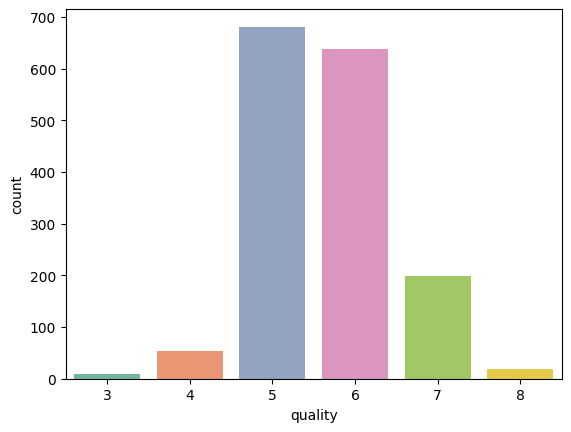

In [10]:
import seaborn as sns
sns.countplot(df,x="quality",palette="Set2")
plt.show()

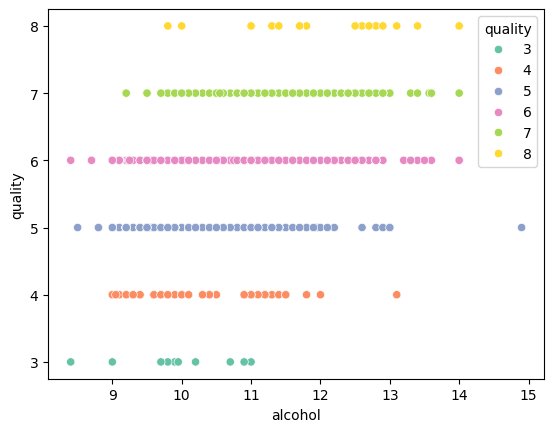

In [11]:
sns.scatterplot(df,x="alcohol",y="quality",hue="quality",palette="Set2")
plt.show()

# Define Target Variable and Feature Variable

In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Train Test Split

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# standardizing the data set

In [15]:
from sklearn.preprocessing  import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Modeling

In [17]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)


SVC()

#model prediction

In [19]:
y_pred = model.predict(X_test)
y_pred

array([5, 5, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 5, 5, 7, 5, 6, 7, 5, 5, 5,
       6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5,
       6, 5, 7, 5, 6, 5, 6, 6, 6, 5, 7, 5, 6, 7, 5, 7, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       6, 5, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 6, 5,
       5, 6, 6, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 7, 6,
       6, 5, 5, 5, 5, 6, 5, 7, 5, 6, 6, 6, 7, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 5, 5, 5, 7, 6, 5, 5, 6, 6, 7, 5, 6, 6, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 5, 7,
       6, 7, 5, 5, 6, 6, 5, 6, 5, 5, 5, 5, 6, 6, 6, 5, 7, 5, 5, 5, 5, 6,
       5, 6, 5, 6, 5, 7, 6, 5, 5, 6, 5, 6, 6, 7, 5,

# Model Evaluation

In [30]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test,y_pred))


[[  0   0   1   0   0   0]
 [  0   0  13   4   0   0]
 [  0   0 153  41   1   0]
 [  0   0  71 121   8   0]
 [  0   0   0  44  17   0]
 [  0   0   0   3   3   0]]


In [31]:
print(accuracy_score(y_test,y_pred))

0.60625


In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.64      0.78      0.71       195
           6       0.57      0.60      0.59       200
           7       0.59      0.28      0.38        61
           8       0.00      0.00      0.00         6

    accuracy                           0.61       480
   macro avg       0.30      0.28      0.28       480
weighted avg       0.57      0.61      0.58       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Future predcition

In [25]:
X =X.iloc[0].values.reshape(1,-1)

In [27]:
# standardrizing the new data
X = sc.transform(X)
X

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[  -5.16042749,    2.11071565,   -8.4608361 ,   -2.10398723,
          -7.1356391 ,   -1.59707086,   -1.43417281, -239.84178859,
         -13.2711303 ,   -7.16061197,  -10.74103977]])

In [28]:
pred = model.predict(X)
pred

array([5])